In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

## read prepared data

In [2]:
combined_data_de = pd.read_csv('combined_data_de.csv', sep=',')
combined_data_de.head()

month  Abgeschlagenheit  Atemgeraeusche  Atemnot  Atemschmerzen  Ausschlag  \
0      1                15              39       23              0         12   
1      2                 0              64       26             68         11   
2      3                15              38       26             61         12   
3      0                17              48       21              0         10   
4      1                12              31       16              0          9   

   Bindehautentzuendung  Diarrhoe  Durchfall  Fieber  ...  AH5  ANOTSUBTYPED  \
0                    18        31         22       9  ...  0.0           4.0   
1                    20         0         19      13  ...  0.0          13.0   
2                    22        23         19      11  ...  0.0           2.0   
3                    17        58         21       8  ...  0.0           0.0   
4                    18        19         19       9  ...  0.0           1.0   

   INF_A  BYAMAGATA  BVICTORIA  BNOTDETERMINED  INF_B  ALL_INF  ALL_INF2  year  
0     57        0.0        0.0            11.0     11       68         0  2005  
1    489        0.0        0.0            23.0     23      512         0  2005  
2    487        0.0        0.0           101.0    101      588         0  2005  
3      0        0.0        0.0             0.0      0        0         0  2005  
4      1        0.0        0.0             0.0      0        1         0  2005  

[5 rows x 38 columns]

## correlation heatmap

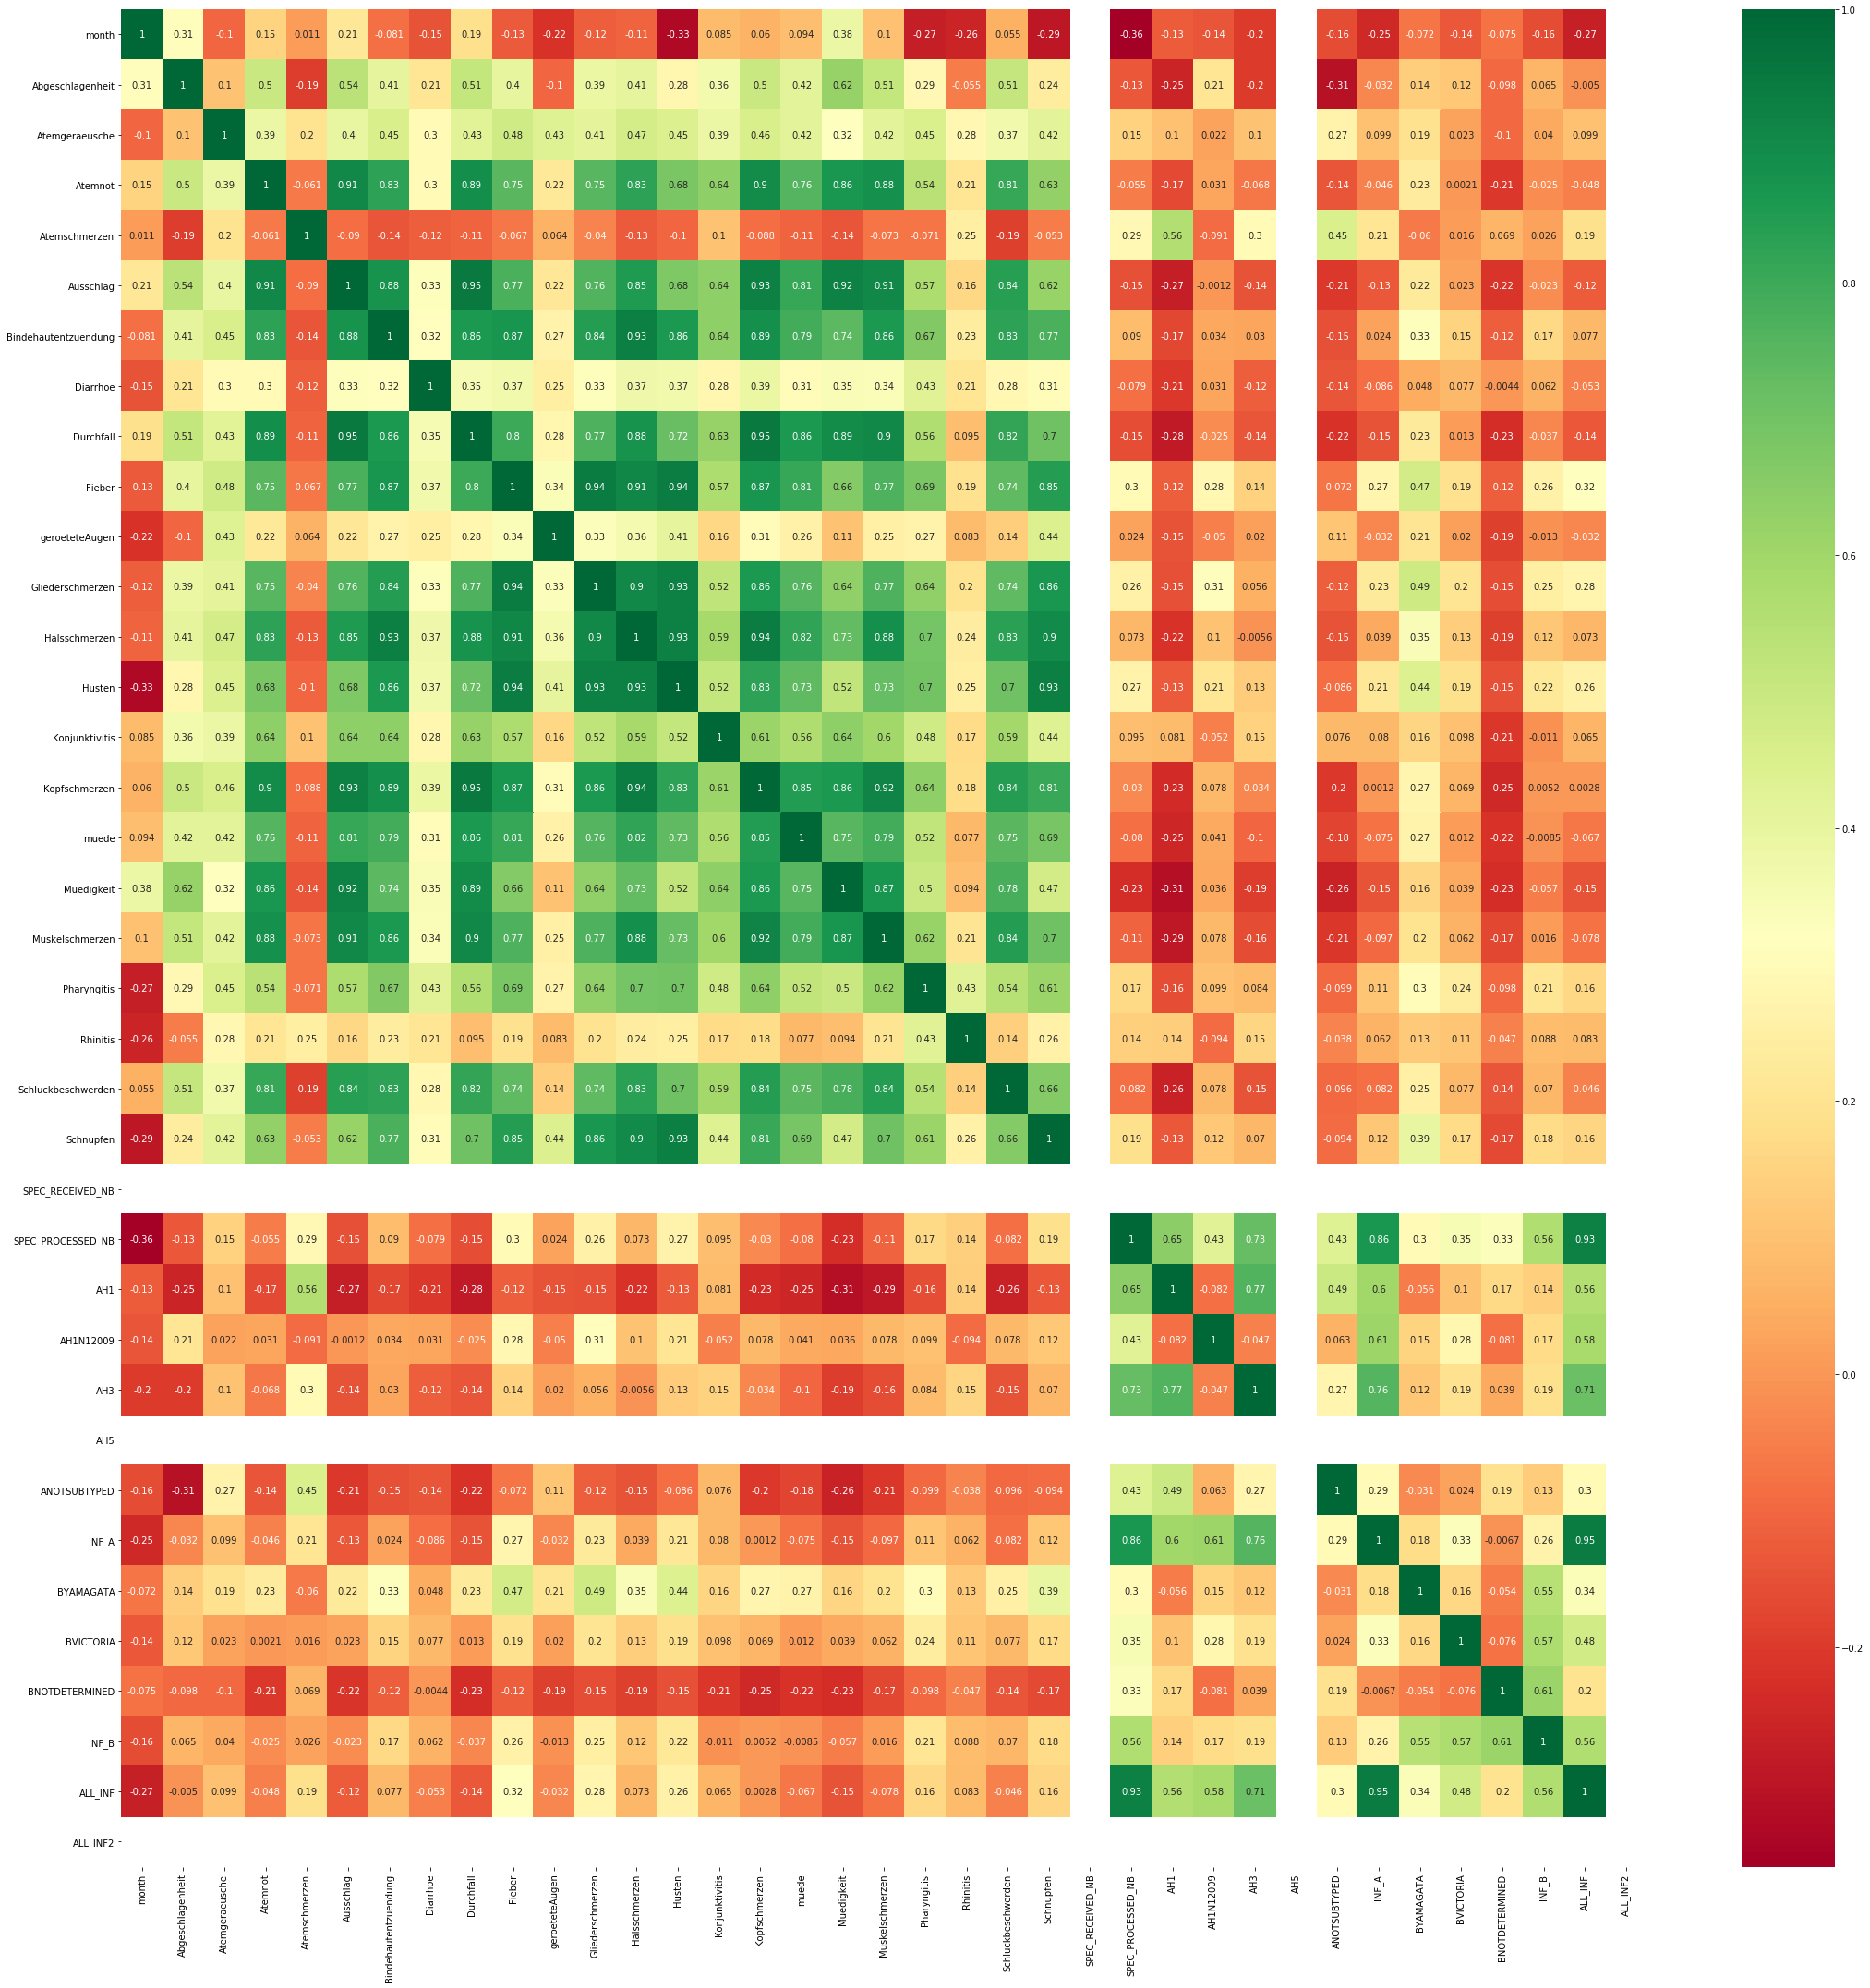

In [3]:
data = combined_data_de.iloc[:,0:37]
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(37,37))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## select data and test feature importance

In [4]:
X = combined_data_de.iloc[:,1:23]
X.head()

Abgeschlagenheit  Atemgeraeusche  Atemnot  Atemschmerzen  Ausschlag  \
0                15              39       23              0         12   
1                 0              64       26             68         11   
2                15              38       26             61         12   
3                17              48       21              0         10   
4                12              31       16              0          9   

   Bindehautentzuendung  Diarrhoe  Durchfall  Fieber  geroeteteAugen  ...  \
0                    18        31         22       9              47  ...   
1                    20         0         19      13              58  ...   
2                    22        23         19      11               0  ...   
3                    17        58         21       8              88  ...   
4                    18        19         19       9               0  ...   

   Husten  Konjunktivitis  Kopfschmerzen  muede  Muedigkeit  Muskelschmerzen  \
0      10              32             19      9          31               20   
1      13              64             18     10          20               26   
2      11              47             23      7          28               28   
3      12              39             25     11          34               25   
4      11              38             24     12          33               28   

   Pharyngitis  Rhinitis  Schluckbeschwerden  Schnupfen  
0           56        71                  25         16  
1           42        72                  29         21  
2           37        90                  26         17  
3           52        65                  20         17  
4           60        93                  25         18  

[5 rows x 22 columns]

#### test feature imporance AH1

In [5]:
Y = combined_data_de.AH1
Y = Y.apply(lambda x: 1 if (x > 50) else 0)

# feature extraction
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X, Y)
print(model.feature_importances_)

[0.04964686 0.04819633 0.0539271  0.09865098 0.0529881  0.01492826
 0.00670564 0.07093781 0.03477249 0.01235137 0.0391661  0.01780597
 0.04239732 0.10386627 0.00445707 0.07058786 0.03491889 0.03405301
 0.07416679 0.05183461 0.05729356 0.02634761]


#### test feature imporance AH1N12009

In [6]:
Y = combined_data_de.AH1N12009
Y = Y.apply(lambda x: 1 if (x > 50) else 0)

# feature extraction
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X, Y)
print(model.feature_importances_)

[0.05009822 0.04701388 0.05046174 0.02471971 0.07161122 0.0323864
 0.05842521 0.04442692 0.06985059 0.04426051 0.07871878 0.03611013
 0.03498475 0.03380107 0.04005216 0.03549651 0.02566356 0.02892038
 0.06844446 0.02799352 0.03638048 0.06017982]


#### test feature imporance AH3

In [7]:
Y = combined_data_de.AH3
Y = Y.apply(lambda x: 1 if (x > 50) else 0)

# feature extraction
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X, Y)
print(model.feature_importances_)

[0.03597528 0.03622861 0.03533601 0.04704612 0.04339862 0.05716731
 0.02782848 0.04151222 0.05330177 0.02921077 0.06309053 0.05282641
 0.07203332 0.03368164 0.0505087  0.04470733 0.03943932 0.04483183
 0.05922612 0.06470157 0.02608963 0.04185842]


#### test feature imporance INF_A

In [8]:
Y = combined_data_de.INF_A
Y = Y.apply(lambda x: 1 if (x > 50) else 0)

# feature extraction
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X, Y)
print(model.feature_importances_)

[0.03391712 0.02691823 0.0425969  0.03589846 0.036533   0.03535192
 0.04250059 0.05238708 0.08279629 0.0327548  0.09266284 0.03617142
 0.03546059 0.03223977 0.04193594 0.05433555 0.05573943 0.04450483
 0.06971157 0.03173186 0.03344698 0.05040483]


#### test feature imporance INF_B

In [9]:
Y = combined_data_de.INF_B
Y = Y.apply(lambda x: 1 if (x > 50) else 0)

# feature extraction
model = ExtraTreesClassifier(n_estimators=20)
model.fit(X, Y)
print(model.feature_importances_)

[0.03775128 0.02815395 0.04068562 0.03911141 0.04438954 0.05246986
 0.03700815 0.05702795 0.07293819 0.0452126  0.09021049 0.03786215
 0.04734187 0.02580133 0.03749239 0.03831388 0.03630606 0.05601781
 0.03979796 0.04631224 0.03906671 0.05072856]
